dataset: https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation

## BUSSINESS UNDERSTANDING

Segmentasi pelanggan adalah praktik membagi basis pelanggan menjadi kelompok-kelompok individu yang memiliki kesamaan dalam hal tertentu yang relevan dengan pemasaran, seperti usia, jenis kelamin, minat, dan kebiasaan belanja.

Segmentasi pelanggan sangat berguna dalam penentuan strategi pasar kedepannya, dengan itu perlu dibuatnya model yang membantu dalam pembagian segmentasi pasar tersebut.

Model ini dibuat untuk mempermudah perusahaan dalam membagi pelanggan mereka berdasarkan dataset yang sudah ada guna menentukan strategi pasar kedepannya guna memperkuat promosi produk mereka

Model ini dibuat dengan metode clustering dengan algoritma KMeans.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


In [25]:
df = pd.read_csv('Test.csv')

# DATA UNDERSTANDING

deskripsi dataset:

Gender = Jenis Kelamin Pelanggan

Ever_Married = Apakah pelanggan sudah menikah?

Age = Umur Pelanggan

Graduated = Apakah pelanggan sudah lulus sekolah?

Profession = Profesi pelanggan

Work_Experience = Lama pengalaman kerja pelanggan

Spending_Score = Kategori nilai yang dihabiskan pelanggan untuk berbelanja di perusahaan tersebut

Family_Size = Jumlah anggota keluarga pelanggan

Var_1 = Jenis produk yang dibeli pelanggan

In [26]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [28]:
df.shape

(2627, 10)

In [29]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [30]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [31]:
df.duplicated().sum()

0

# DATA PREPROSESSING

In [32]:
df = df.dropna()

In [33]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [34]:
df.drop('ID',axis=1,inplace=True)

<ipython-input-34-f201c9321a6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('ID',axis=1,inplace=True)


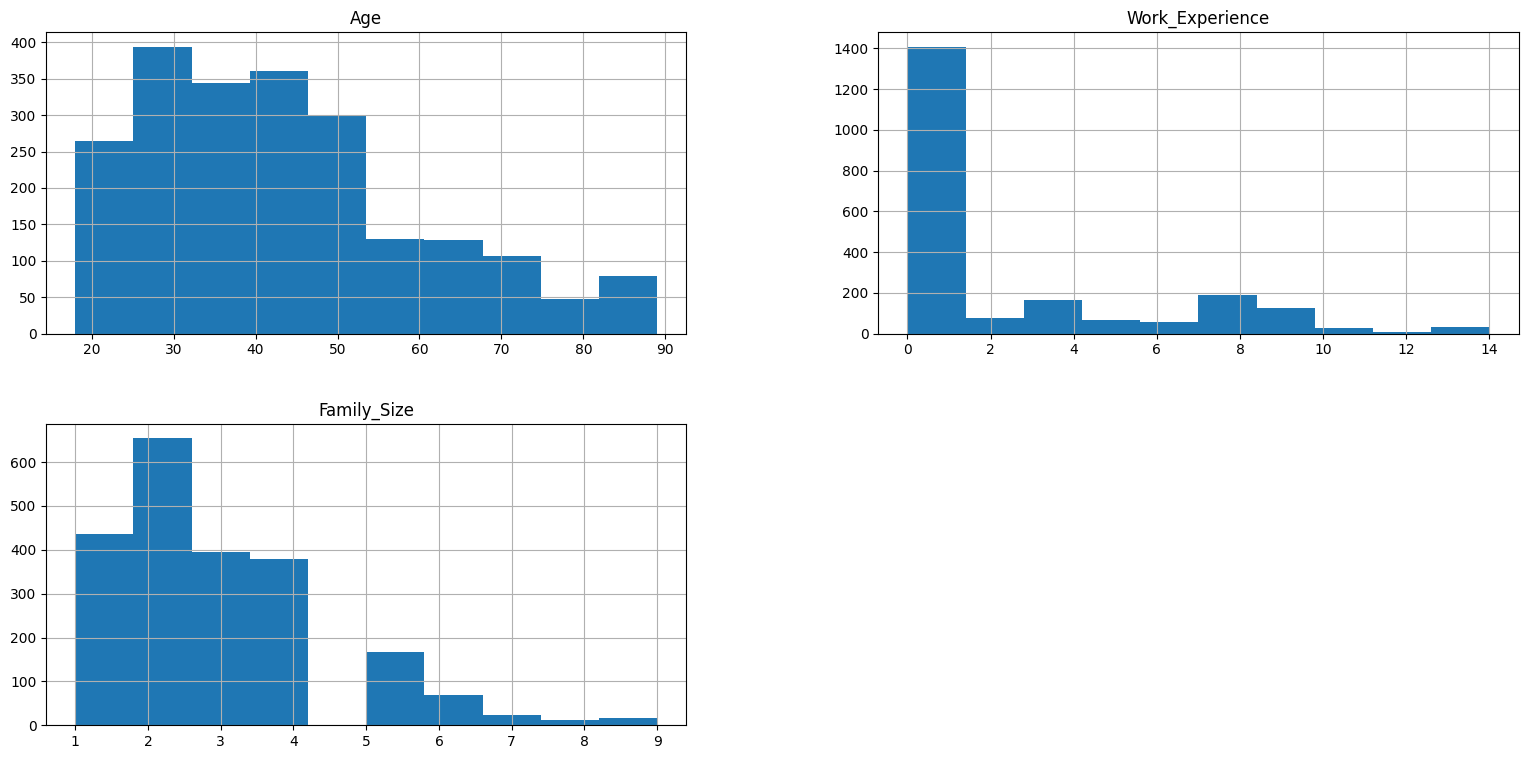

In [35]:
df.hist(figsize=(19,9));

Male      1184
Female     970
Name: Gender, dtype: int64

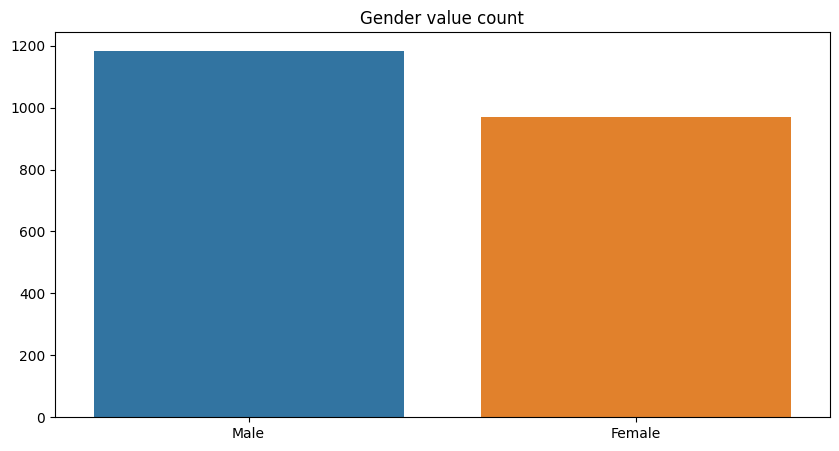

Yes    1272
No      882
Name: Ever_Married, dtype: int64

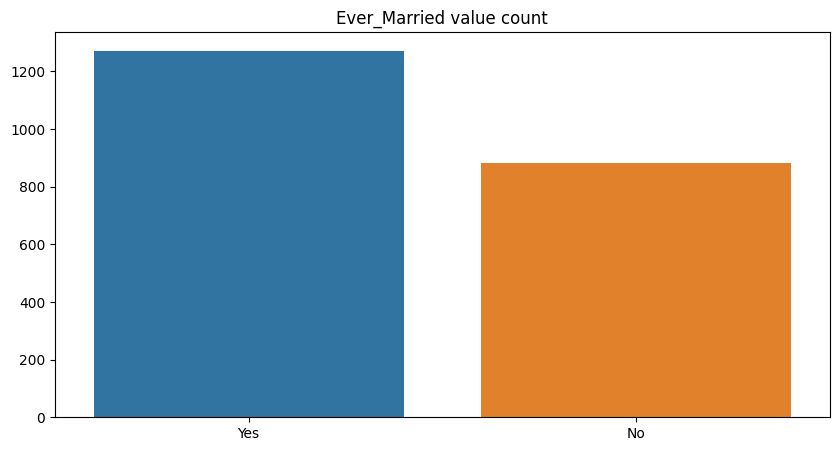

42    74
30    67
43    64
28    63
46    62
      ..
89     7
82     7
75     5
81     5
78     4
Name: Age, Length: 67, dtype: int64

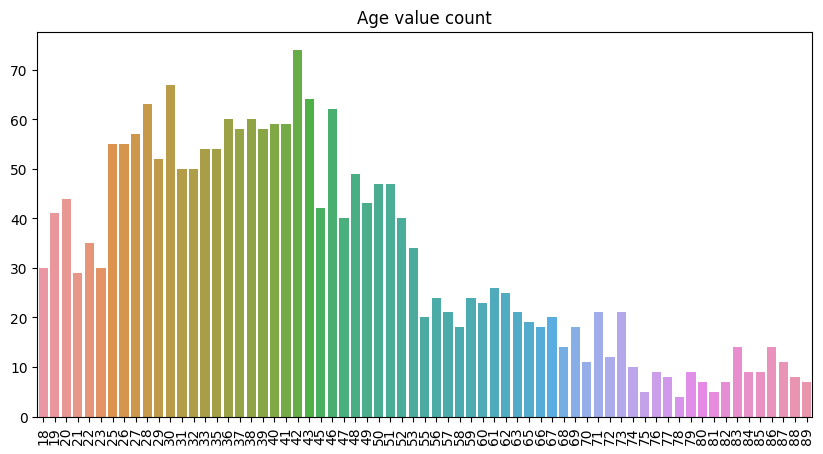

Yes    1345
No      809
Name: Graduated, dtype: int64

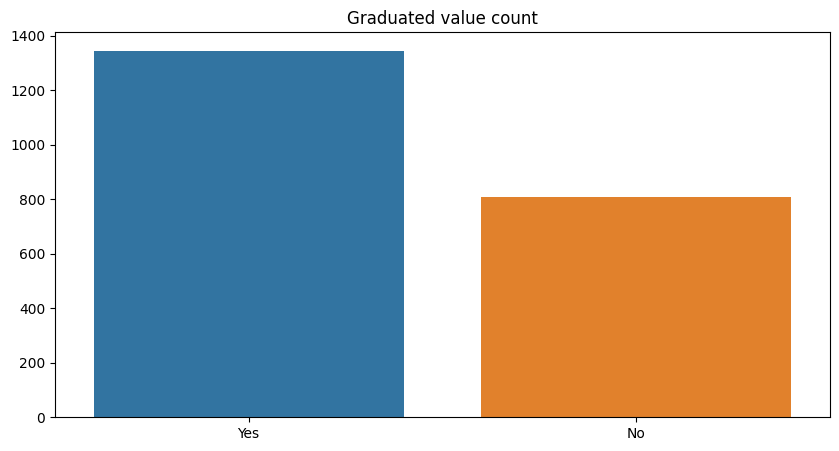

Artist           696
Healthcare       337
Entertainment    254
Doctor           206
Engineer         195
Lawyer           173
Executive        147
Marketing         92
Homemaker         54
Name: Profession, dtype: int64

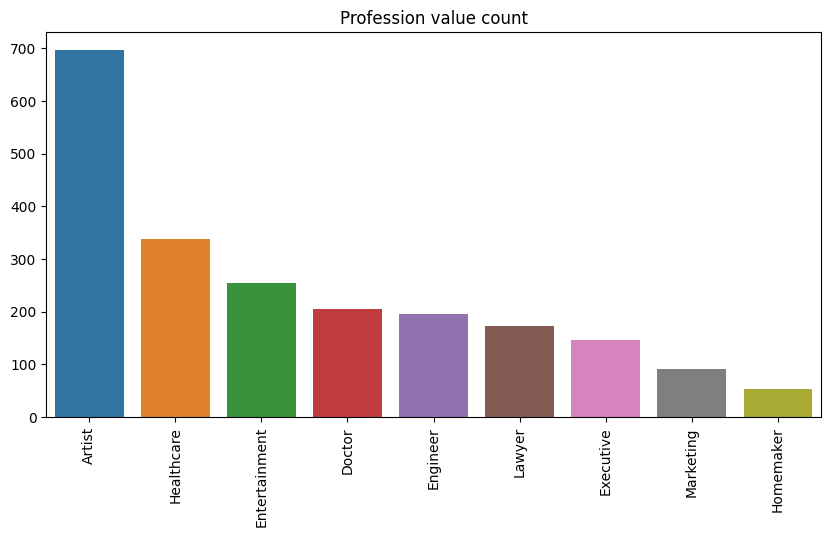

1.0     705
0.0     704
8.0     134
9.0     126
4.0      86
2.0      78
3.0      77
5.0      69
6.0      55
7.0      55
14.0     20
11.0     14
10.0     11
13.0     10
12.0     10
Name: Work_Experience, dtype: int64

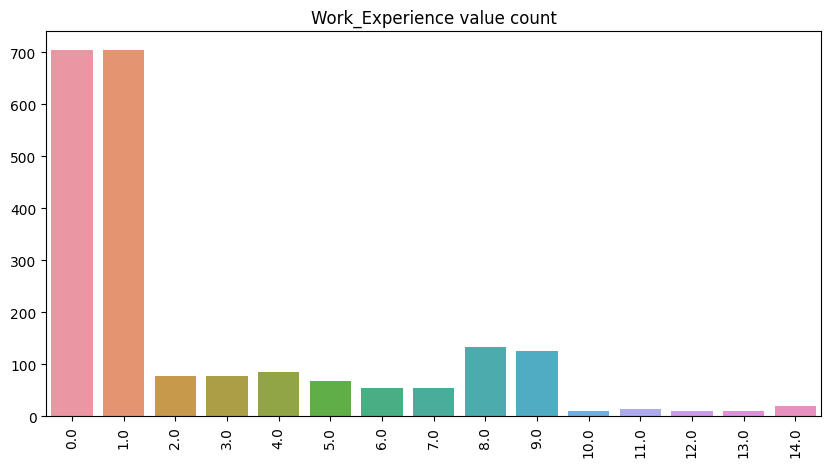

Low        1326
Average     521
High        307
Name: Spending_Score, dtype: int64

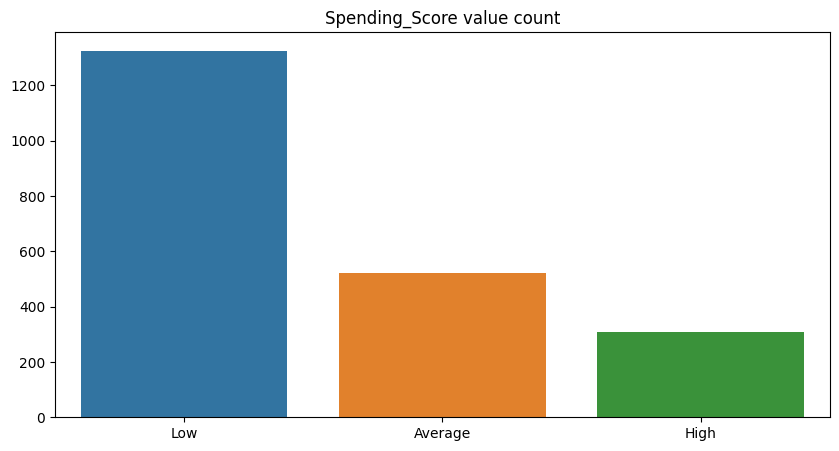

2.0    654
1.0    437
3.0    394
4.0    379
5.0    168
6.0     70
7.0     24
9.0     16
8.0     12
Name: Family_Size, dtype: int64

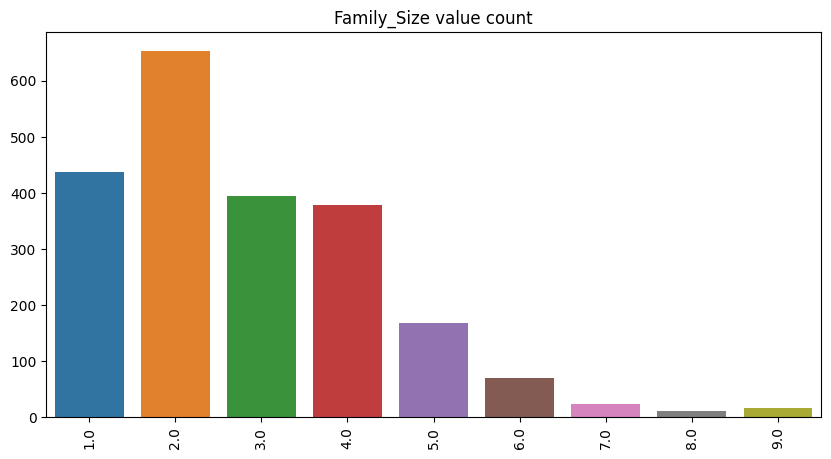

Cat_6    1421
Cat_4     320
Cat_3     195
Cat_2     116
Cat_7      52
Cat_1      27
Cat_5      23
Name: Var_1, dtype: int64

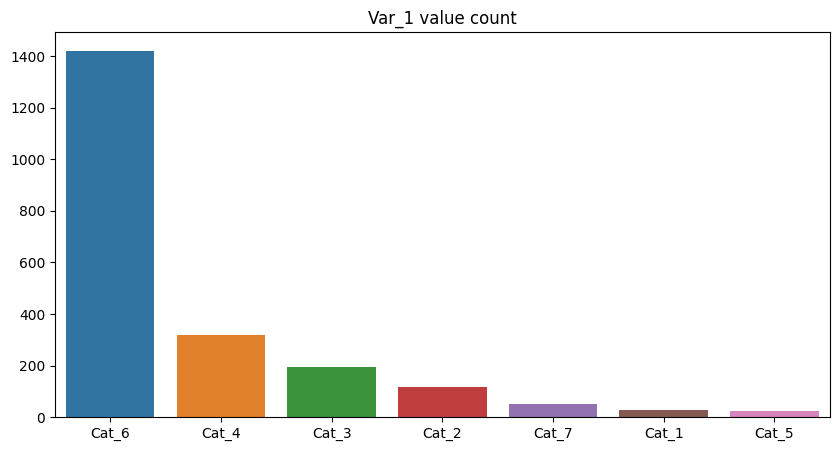

In [36]:
for i in df.columns:
    display(df[i].value_counts())
    plt.figure(figsize=(10,5))
    sns.barplot(x=df[i].value_counts().index,y=df[i].value_counts().values)
    if len(df[i].value_counts().index)>=9:
        plt.xticks(rotation=90)
    plt.title(f'{i} value count')
    plt.show()

In [37]:
encode=OrdinalEncoder(dtype=object)
df_encode=pd.DataFrame(encode.fit_transform(df),columns=df.columns)
df_encode.head(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,16,1,2,0,2,0,5
1,1,1,17,1,5,8,0,3,5
2,1,1,37,0,4,11,1,1,5


In [38]:
stand=StandardScaler()
stand=stand.fit_transform(df_encode)
stand

array([[-1.10481607,  0.83270417, -0.46479756, ...,  0.73920161,
        -1.17270206,  0.60071794],
       [ 0.90512803,  0.83270417, -0.39942544, ..., -1.62142147,
         0.74238531,  0.60071794],
       [ 0.90512803,  0.83270417,  0.90801685, ..., -0.44110993,
        -0.53433961,  0.60071794],
       ...,
       [-1.10481607, -1.20090669, -0.53016967, ...,  0.73920161,
        -1.17270206,  0.60071794],
       [ 0.90512803,  0.83270417,  0.18892359, ..., -0.44110993,
         1.38074776, -0.84100512],
       [-1.10481607, -1.20090669, -0.00719275, ...,  0.73920161,
         0.10402285,  1.32157948]])

# MODELLING

In [39]:
X = df_encode

In [40]:
print(X)

     Gender Ever_Married Age Graduated Profession Work_Experience  \
0         0            1  16         1          2               0   
1         1            1  17         1          5               8   
2         1            1  37         0          4              11   
3         1            1  26         1          1               0   
4         1            1  39         1          1               5   
...     ...          ...  ..       ...        ...             ...   
2149      0            0  15         1          3               1   
2150      1            0  10         0          5               9   
2151      0            0  15         1          1               1   
2152      1            1  26         1          4               1   
2153      0            0  23         1          5               9   

     Spending_Score Family_Size Var_1  
0                 2           0     5  
1                 0           3     5  
2                 1           1     5  
3          

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

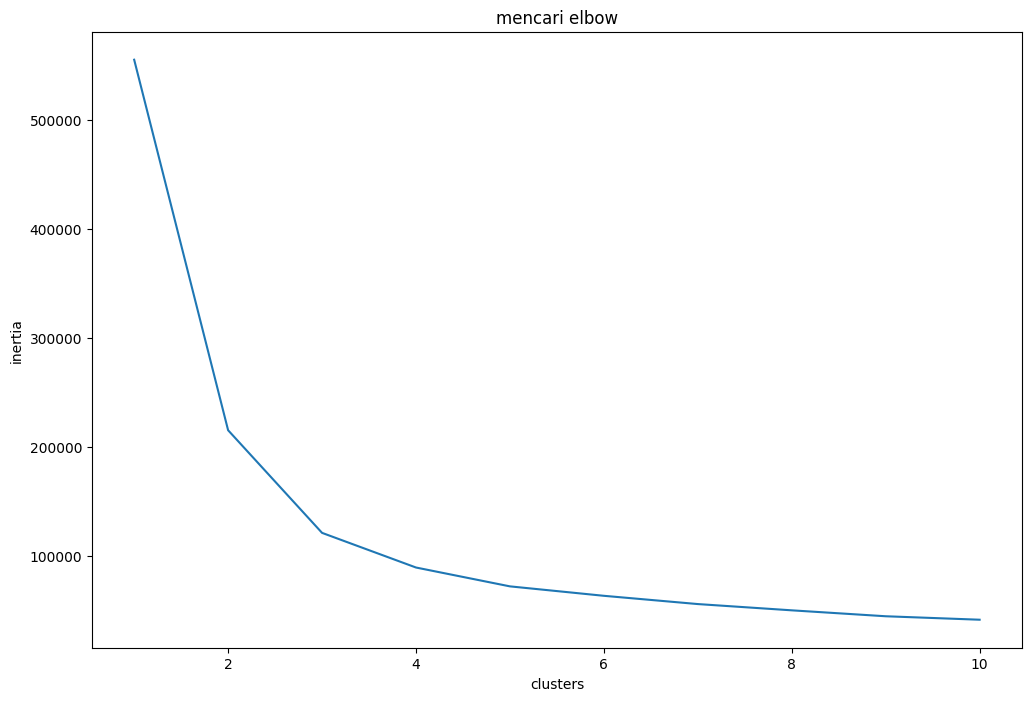

In [41]:
clusters=[]
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)),y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')


cluster optimal ada di 2-4

In [42]:
n_clust = 3
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

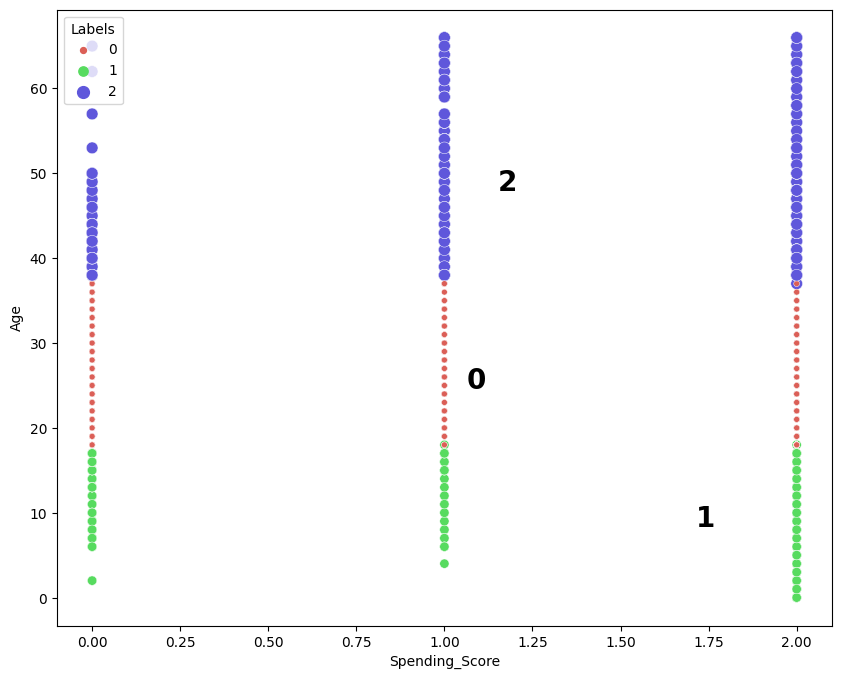

In [44]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X, x='Spending_Score', y='Age', hue='Labels', markers=True, size='Labels', palette=sns.color_palette('hls', n_clust))

for label in X['Labels'].unique():
    plt.annotate(label,
                 (X[X['Labels'] == label]['Spending_Score'].mean(),
                  X[X['Labels'] == label]['Age'].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='black')

plt.show()

In [45]:
print(X)

     Gender Ever_Married Age Graduated Profession Work_Experience  \
0         0            1  16         1          2               0   
1         1            1  17         1          5               8   
2         1            1  37         0          4              11   
3         1            1  26         1          1               0   
4         1            1  39         1          1               5   
...     ...          ...  ..       ...        ...             ...   
2149      0            0  15         1          3               1   
2150      1            0  10         0          5               9   
2151      0            0  15         1          1               1   
2152      1            1  26         1          4               1   
2153      0            0  23         1          5               9   

     Spending_Score Family_Size Var_1  Labels  
0                 2           0     5       1  
1                 0           3     5       1  
2                 1        

In [46]:
X.to_excel('output_cluster.xlsx')